In [37]:
from pathlib import Path

import numpy as np

from astropy import units as u
from astropy import constants as cnst
from astropy.io import fits

from astropy.visualization import quantity_support
quantity_support()

from matplotlib import pyplot as plt

In [2]:
datapath = Path('../fullgrid/')

In [3]:
wlspath = datapath / 'WAVE_PHOENIX-ACES-AGSS-COND-2011.fits'

wlsraw = fits.getdata(wlspath)
wls = wlsraw << u.Unit(fits.getheader(wlspath)['UNIT'])

wls

<Quantity [  500.  ,   500.1 ,   500.2 , ..., 54999.25, 54999.5 , 54999.75] Angstrom>

In [4]:
allspecpaths = list(datapath.glob('lte*HiRes.fits'))
len(allspecpaths)

7559

# Explore an example file for format info

In [5]:
spec0 = fits.open(allspecpaths[0])
spec0.info()

Filename: ../fullgrid/lte02300-0.00+0.5.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   (1569128,)   float32   
  1  ABUNDANCES    1 BinTableHDU     15   83R x 3C   [I, 2A, E]   


In [6]:
spec0[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =              1569128                                                  
EXTEND  =                    T                                                  
EXTNAME = 'PRIMARY '                                                            
WAVE    = '../../WAVE_PHOENIX-ACES-AGSS-COND-2011.fits' / Wavelength array      
PHXTEFF =               2300.0 / [K] effective temperature                      
PHXLOGG =                  0.0 / [cm/s^2] log (surface gravity)                 
PHXM_H  =                  0.5 / [M/H] metallicity (rel. sol. - Asplund &a 2009)
PHXALPHA=                  0.0 / [a/M] alpha element enhancement                
PHXDUST =                    F / Dust in atmosphere                             
PHXEOS  = 'ACES    '        

In [7]:
spec0[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    8 / length of dimension 1                          
NAXIS2  =                   83 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'ID      '                                                            
TFORM1  = 'I       '                                                            
TTYPE2  = 'Element '                                                            
TFORM2  = '2A      '                                                            
TTYPE3  = 'Abundance'       

In [8]:
sunit = u.Unit(spec0[0].header['BUNIT'])

In [9]:
abund0 = {e['Element']:e['Abundance'] for e in spec0[1].data}
abund0['H'],  abund0['Fe']

(np.float32(12.0), np.float32(8.0))

In [10]:
from specutils import Spectrum1D

In [11]:
s1d0 = Spectrum1D(spectral_axis=wls, flux=spec0[0].data << sunit)

# Resampling tests

In [12]:
from specutils import manipulation

In [13]:
tres = []

89.6 ms ± 749 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


(100000000.0, 100000000000000.0)

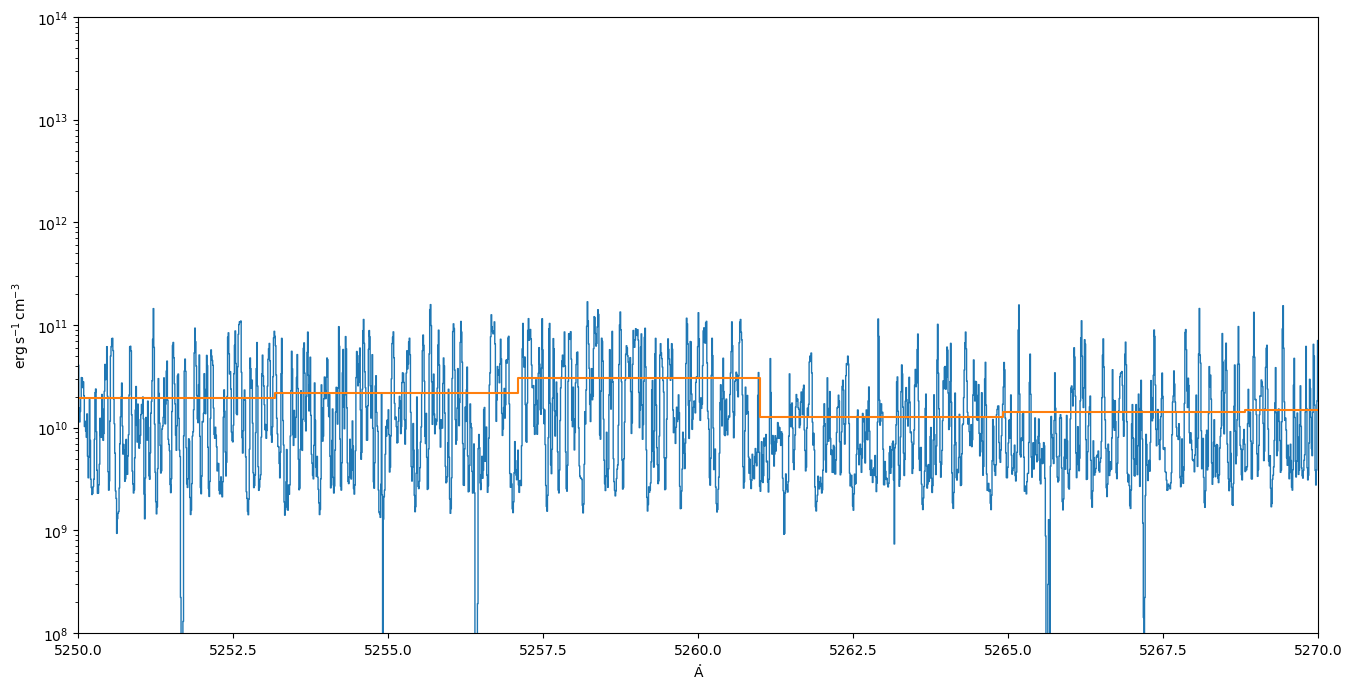

In [14]:
newwl = np.linspace(4000,8000,1024)*u.angstrom

t = %timeit -o manipulation.FluxConservingResampler()(s1d0, newwl)
tres.append((newwl.size, t))

news0 = manipulation.FluxConservingResampler()(s1d0, newwl)
plt.figure(figsize=(16, 8))
plt.semilogy(s1d0.spectral_axis, s1d0.flux, lw=1, ds='steps-mid')
plt.semilogy(news0.spectral_axis, news0.flux, ds='steps-mid')
plt.xlim(5250*u.angstrom, 5270*u.angstrom)
plt.ylim(1e8, 1e14)

117 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


(100000000.0, 100000000000000.0)

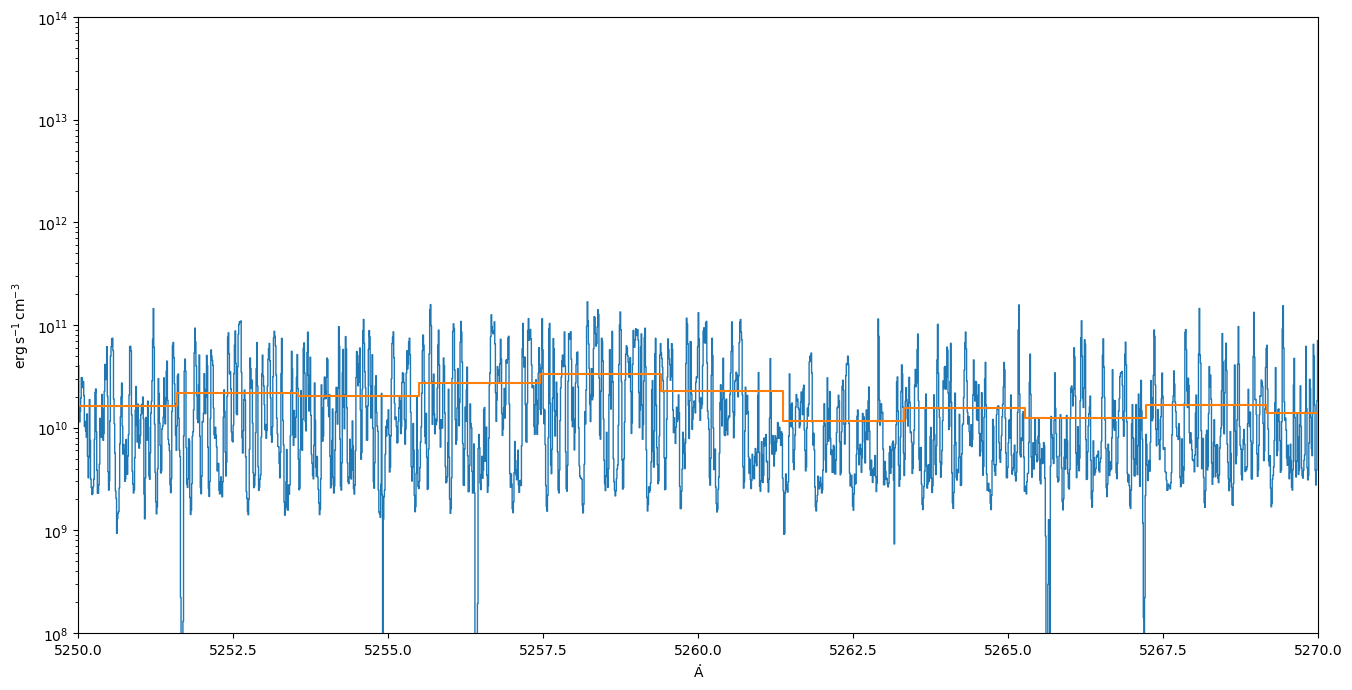

In [15]:
newwl = np.linspace(4000,8000,1024*2)*u.angstrom

t = %timeit -o manipulation.FluxConservingResampler()(s1d0, newwl)
tres.append((newwl.size, t))

news0 = manipulation.FluxConservingResampler()(s1d0, newwl)
plt.figure(figsize=(16, 8))
plt.semilogy(s1d0.spectral_axis, s1d0.flux, lw=1, ds='steps-mid')
plt.semilogy(news0.spectral_axis, news0.flux, ds='steps-mid')
plt.xlim(5250*u.angstrom, 5270*u.angstrom)
plt.ylim(1e8, 1e14)

163 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


(100000000.0, 100000000000000.0)

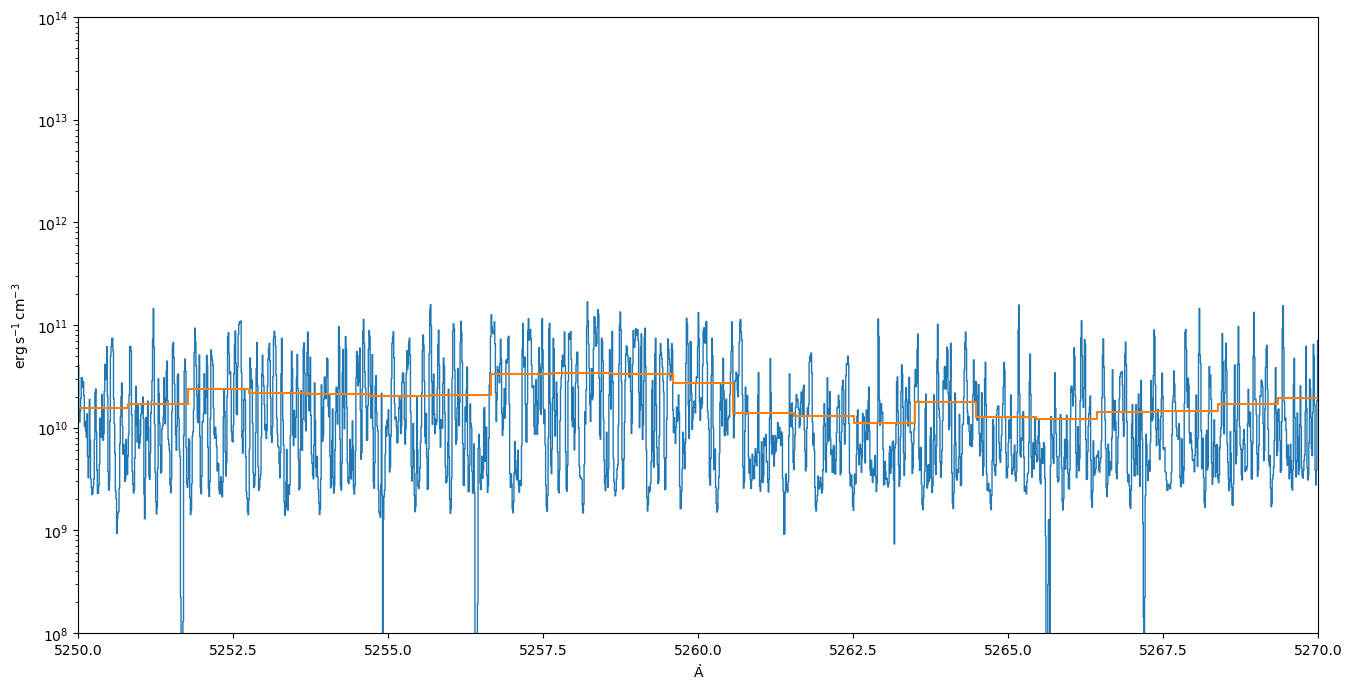

In [16]:
newwl = np.linspace(4000,8000,1024*2*2)*u.angstrom

t = %timeit -o manipulation.FluxConservingResampler()(s1d0, newwl)
tres.append((newwl.size, t))

news0 = manipulation.FluxConservingResampler()(s1d0, newwl)
plt.figure(figsize=(16, 8))
plt.semilogy(s1d0.spectral_axis, s1d0.flux, lw=1, ds='steps-mid')
plt.semilogy(news0.spectral_axis, news0.flux, ds='steps-mid')
plt.xlim(5250*u.angstrom, 5270*u.angstrom)
plt.ylim(1e8, 1e14)

263 ms ± 4.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


(100000000.0, 100000000000000.0)

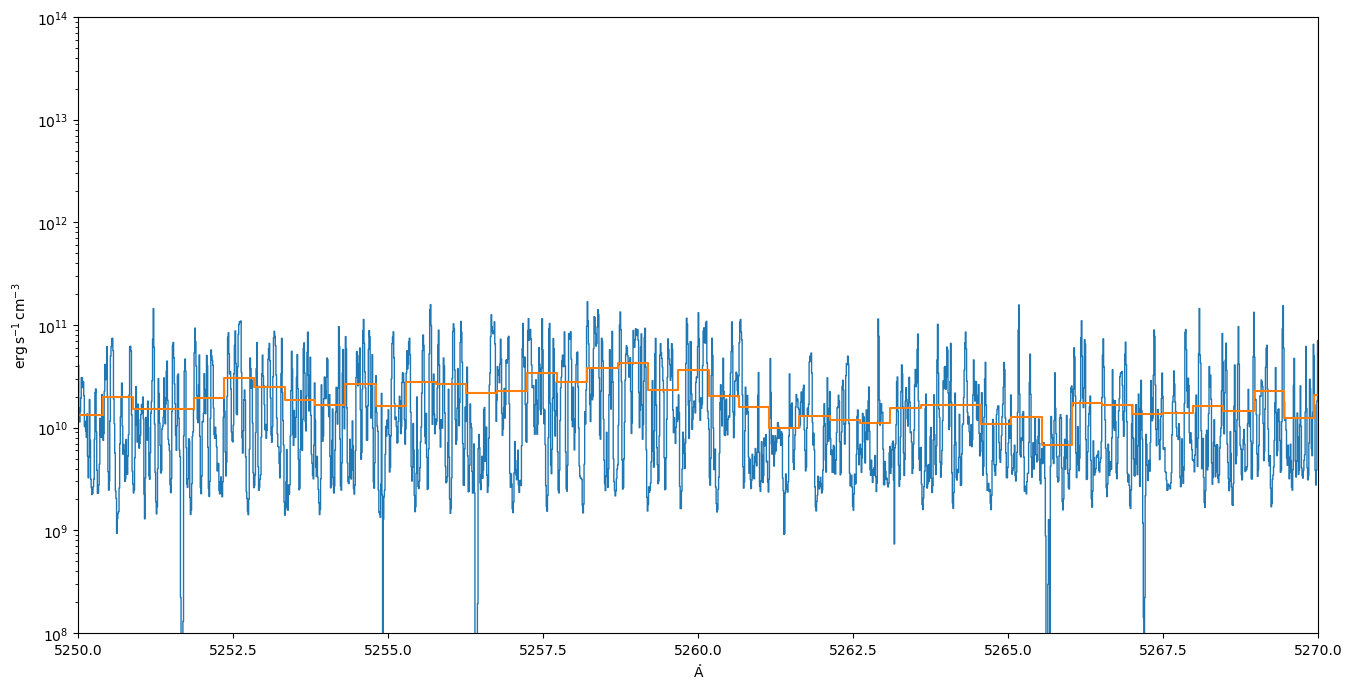

In [17]:
newwl = np.linspace(4000,8000,1024*2*2*2)*u.angstrom

t = %timeit -o manipulation.FluxConservingResampler()(s1d0, newwl)
tres.append((newwl.size, t))

news0 = manipulation.FluxConservingResampler()(s1d0, newwl)
plt.figure(figsize=(16, 8))
plt.semilogy(s1d0.spectral_axis, s1d0.flux, lw=1, ds='steps-mid')
plt.semilogy(news0.spectral_axis, news0.flux, ds='steps-mid')
plt.xlim(5250*u.angstrom, 5270*u.angstrom)
plt.ylim(1e8, 1e14)

<ErrorbarContainer object of 3 artists>

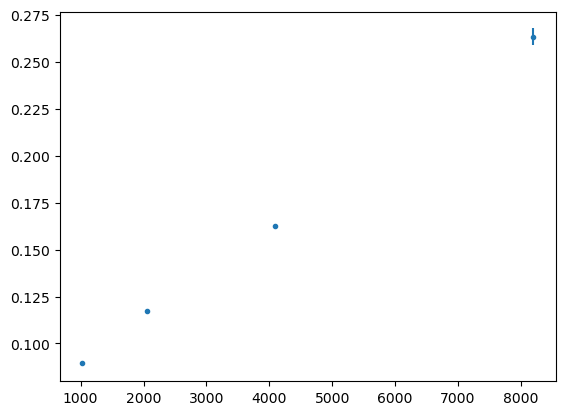

In [18]:
plt.errorbar([x for x,_ in tres], [t.average for _,t in tres], [t.stdev for _,t in tres], fmt='.')

Scales linearly with the newwl size which is good.  Can use the above then to make model spectra.

# Rescaling to observed fluxes

In [19]:
reff = spec0[0].header['PHXREFF'] * u.cm
lum = spec0[0].header['PHXLUM'] * u.W
reff, lum

(<Quantity 1.0266e+13 cm>, <Quantity 2.1025e+36 W>)

In [20]:
dwl = np.diff(s1d0.spectral_axis.bin_edges)
srfacesb = np.sum(s1d0.flux * dwl).to(u.W * u.cm**-2)
star_surface = 4*np.pi*reff**2
(srfacesb*star_surface).to(lum.unit)

<Quantity 1.80866553e+29 W>

In [21]:
lum

<Quantity 2.1025e+36 W>

In [22]:
u.solRad.to(u.km)

695700.0

In [23]:
reff.to(u.km)

<Quantity 1.0266e+08 km>

Something is pretty far off.  Lets try some alternative units:

In [24]:
lum2 = spec0[0].header['PHXLUM'] * u.erg/u.s

lum2

<Quantity 2.1025e+36 erg / s>

In [25]:
(srfacesb*star_surface).to(lum2.unit)

<Quantity 1.80866553e+36 erg / s>

That's the right ballpark... and consistent with https://phoenix.astro.physik.uni-goettingen.de/?page_id=10

lets compare to a solar-like star to confirm.

In [26]:
f1 = [p for p in allspecpaths if int(str(p).split('lte')[1].split('-')[0]) == 5800]
f2 = [p for p in f1 if '0.0.PHOENIX' in str(p)]
f3 = [p for p in f2 if '-4.50-' in str(p)]
assert len(f3)==1
solaranalog = fits.open(f3[0])
ssolaranalog = Spectrum1D(spectral_axis=wls, flux=solaranalog[0].data << u.Unit(solaranalog[0].header['BUNIT']))

In [27]:
reff = solaranalog[0].header['PHXREFF'] * u.cm
lum = solaranalog[0].header['PHXLUM'] * u.erg/u.s

reff.to(u.km), u.solRad.to(u.km)

(<Quantity 651200. km>, 695700.0)

In [28]:
srfacesb = np.sum(ssolaranalog.flux * dwl).to(u.W * u.cm**-2)
star_surface = 4*np.pi*reff**2
(srfacesb*star_surface).to(lum.unit)

<Quantity 3.36819511e+33 erg / s>

In [29]:
lum

<Quantity 3.4194e+33 erg / s>

These are very close, larger lum is likely out-of-band effects, so it appears the lum unit is wrong but reff is correct. Implies the following:

In [30]:
ssolaranalog.flux

<Quantity [3.6688212e-14, 3.7255633e-14, 3.7831592e-14, ..., 1.1696016e+12,
           1.1690953e+12, 1.1694891e+12] erg / (s cm3)>

In [31]:
luminosity_density = ssolaranalog.flux*4*np.pi*(solaranalog[0].header['PHXREFF'] * u.cm)**2
luminosity_density

<Quantity [1.95508300e+09, 1.98532036e+09, 2.01601265e+09, ...,
           6.23270559e+34, 6.23000739e+34, 6.23210619e+34] erg / (cm s)>

In [32]:
distance = 10*u.pc
flux_at_10pc = (luminosity_density / (4*np.pi*(10*u.pc)**2)).to(u.erg/u.s * u.cm**-2 / u.Angstrom)
flux_at_10pc

<Quantity [1.63400825e-39, 1.65927986e-39, 1.68493169e-39, ...,
           5.20913555e-14, 5.20688046e-14, 5.20863459e-14] erg / (Angstrom s cm2)>

In [33]:
mean_in_555 = flux_at_10pc[(5000*u.Angstrom < ssolaranalog.spectral_axis)&(ssolaranalog.spectral_axis < 6000*u.Angstrom)].mean()
photon_energy555 = cnst.h*cnst.c/(5550*u.Angstrom)
((mean_in_555 * np.pi*(1.2*u.m)**2 *  1123*u.Angstrom * 1 * u.s)/photon_energy555).decompose() * .35  # the .35 is a rough QE for ACS/WFC F555W

<Quantity 1.89358991e+08>

Huzzah!  this is approximately what the ACS ETC says is the photon count per sec for the sun at a distance of 10 pc